# Bank Marketing Dataset
### Source: UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)

### Goal: Predicting Term Deposit Subscription
> The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

### Input variables:
#### Bank client data:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

#### Related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### Other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

#### Social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# I. Data

In [3]:
df = pd.read_csv('bank-additional-full.csv', sep=';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
df1=pd.DataFrame()

df1['dataFeatures'] = df.columns

dataType,null,unique,uniqueSample=[],[],[],[]
for i in df.columns:
    dataType.append(df[i].dtype)
    null.append(df[i].isna().sum())
    unique.append(len(df[i].unique()))
    uniqueSample.append(df[i].sample(2).values)
    
df1['dataType']=dataType
df1['null']=null
df1['nullPct']=round(df1['null']/len(df)*100,2)
df1['unique']=unique
df1['uniqueSample']=uniqueSample

df1

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,age,int64,0,0.0,78,"[52, 31]"
1,job,object,0,0.0,12,"[blue-collar, technician]"
2,marital,object,0,0.0,4,"[married, married]"
3,education,object,0,0.0,8,"[university.degree, high.school]"
4,default,object,0,0.0,3,"[no, unknown]"
5,housing,object,0,0.0,3,"[yes, yes]"
6,loan,object,0,0.0,3,"[no, no]"
7,contact,object,0,0.0,2,"[telephone, telephone]"
8,month,object,0,0.0,10,"[nov, may]"
9,day_of_week,object,0,0.0,5,"[tue, fri]"


Based on the result above, there is no missing value in the dataset.

# II. Exploratory Data Analysis (EDA)

## 1. Categorical Columns Exploration

Categorical columns in ths dataset are 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', and 'poutcome'

### A. Job

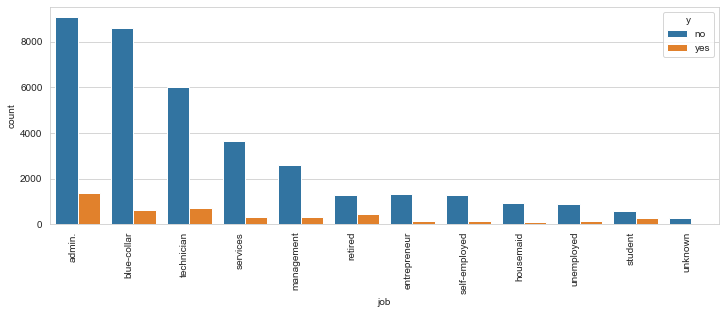

In [8]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,4))
sns.countplot(data=df, x='job', hue='y', order=df['job'].value_counts(ascending=False).index)
plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light'  
)
plt.show()

Based on the graph, we could see that the most prominent job is admin. Now we want to calculate the probability of each job to accept the deposit.

In [9]:
percentage = {}
for i in df['job'].value_counts(ascending=False).index:
    percentage[i] = (len(df[(df['job']==i) & (df['y']=='yes')]) / len(df[df['job']==i])) * 100
pd.DataFrame(percentage, index=['percentage']).transpose()

,percentage
admin.,12.972558
blue-collar,6.894316
technician,10.826042
services,8.138070
management,11.217510
retired,25.232558
entrepreneur,8.516484
self-employed,10.485574
housemaid,10.000000
unemployed,14.201183


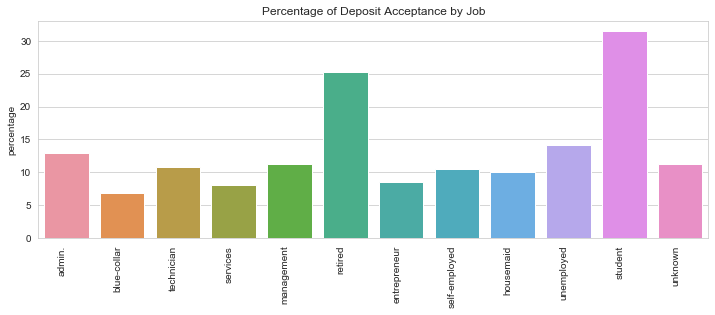

In [10]:
plt.figure(figsize=(12,4))
sns.barplot(x=pd.DataFrame(percentage, index=['percentage']).transpose().index, y=pd.DataFrame(percentage, index=['percentage']).transpose()['percentage'])
plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light'  
)
plt.title('Percentage of Deposit Acceptance by Job')
plt.show()

Based on the graph and calculation, admin has the highest percentage of deposit acceptance, meaning that 3,28% of all admin clients have accepted the bank term deposit that has been offered. The lowest percentage of deposit acceptance is by student clients.

### B. Marital

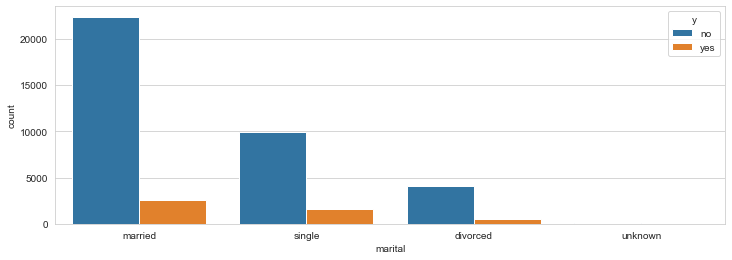

In [11]:
plt.figure(figsize=(12,4))
sns.countplot(data=df, x='marital', hue='y', order=df['marital'].value_counts(ascending=False).index)

plt.show()

We can see that most of the clients are married. Now we will evaluate the percentage of each marital status to accept the term deposit.

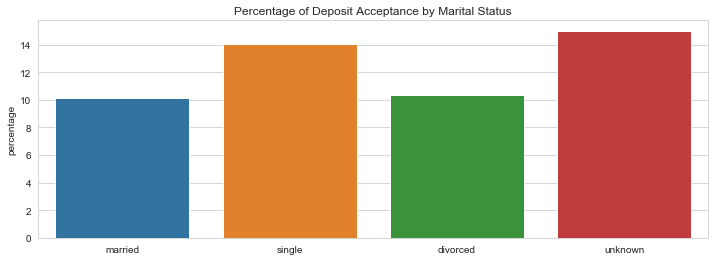

In [12]:
percentage = {}
for i in df['marital'].value_counts(ascending=False).index:
    percentage[i] = (len(df[(df['marital']==i) & (df['y']=='yes')]) / len(df[df['marital']==i])) * 100
    
plt.figure(figsize=(12,4))
sns.barplot(x=pd.DataFrame(percentage, index=['percentage']).transpose().index, y=pd.DataFrame(percentage, index=['percentage']).transpose()['percentage'])

plt.title('Percentage of Deposit Acceptance by Marital Status')
plt.show()

It is shown that 6% of married clients have accepted the term deposit. We also can see that divorced clients tend to reject the deposit because the percentage is quite small.

### C. Education

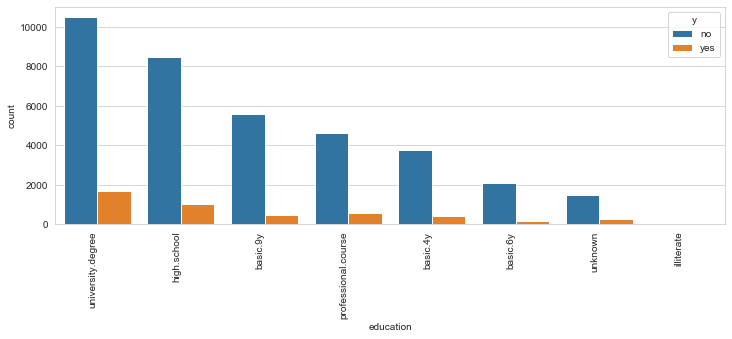

In [13]:
plt.figure(figsize=(12,4))
sns.countplot(data=df, x='education', hue='y', order=df['education'].value_counts(ascending=False).index)
plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light'  
)
plt.show()

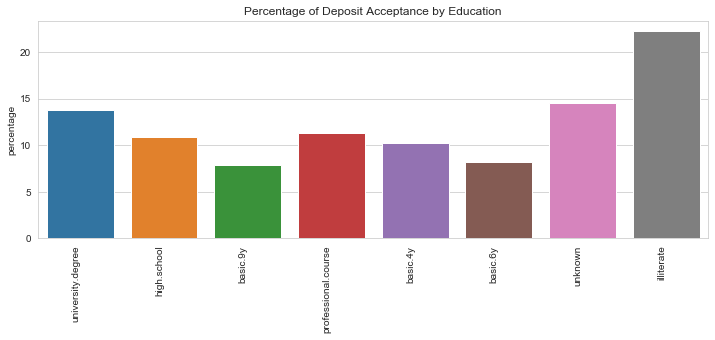

In [14]:
percentage = {}
for i in df['education'].value_counts(ascending=False).index:
    percentage[i] = (len(df[(df['education']==i) & (df['y']=='yes')]) / len(df[df['education']==i])) * 100

plt.figure(figsize=(12,4))    
sns.barplot(x=pd.DataFrame(percentage, index=['percentage']).transpose().index, y=pd.DataFrame(percentage, index=['percentage']).transpose()['percentage'])
plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light'  
)
plt.title('Percentage of Deposit Acceptance by Education')
plt.show()

### D. Loans

There are 3 columns that describe the clients loans characteristics: 'default', 'housing', 'loan'

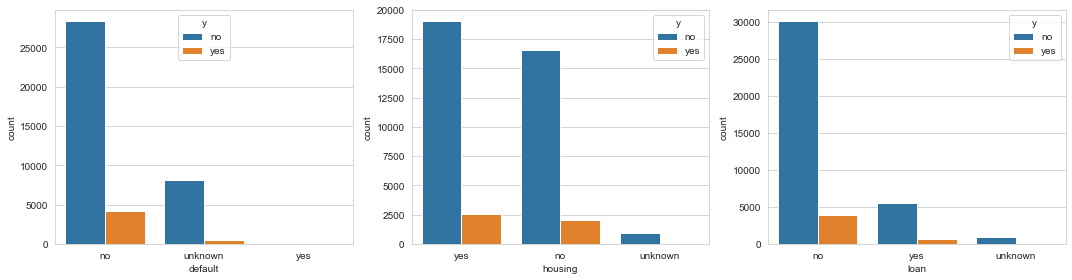

In [15]:
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
sns.countplot(data=df, x='default', hue='y', order=df['default'].value_counts(ascending=False).index)

plt.subplot(1,3,2)
sns.countplot(data=df, x='housing', hue='y', order=df['housing'].value_counts(ascending=False).index)

plt.subplot(1,3,3)
sns.countplot(data=df, x='loan', hue='y', order=df['loan'].value_counts(ascending=False).index)

plt.tight_layout()
plt.show()

'deafult' column indicates whether the client has credit in default. The graph showed that majority of clients do not have credit in default.

'housing' column indicates whether the client has housing loan. It is shown that most of the clients has ongoing housing loan.

'loan' column indicates whether the client has personal loan. We can see that most of the clients do not have personal loan.

### E. Campaign

The columns 'contact', 'month', and 'day_of_week' give information regarding the type and time of the campaign.

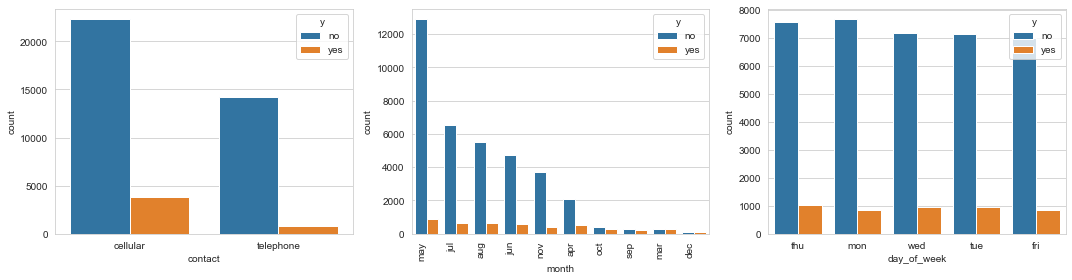

In [16]:
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
sns.countplot(data=df, x='contact', hue='y', order=df['contact'].value_counts(ascending=False).index)

plt.subplot(1,3,2)
sns.countplot(data=df, x='month', hue='y', order=df['month'].value_counts(ascending=False).index)
plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light'  
)

plt.subplot(1,3,3)
sns.countplot(data=df, x='day_of_week', hue='y', order=df['day_of_week'].value_counts(ascending=False).index)
plt.tight_layout()
plt.show()

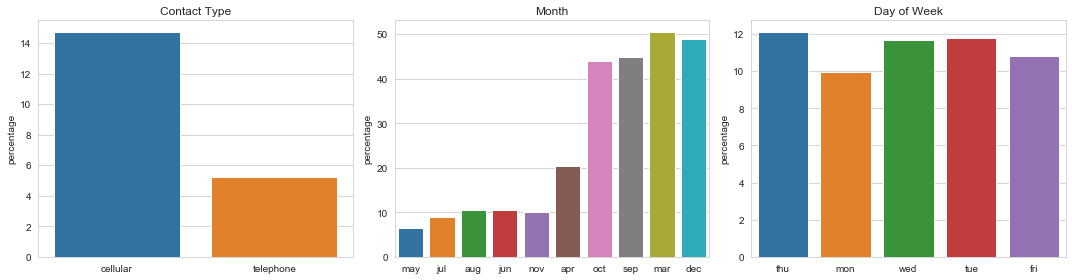

In [17]:
percentage_contact = {}
for i in df['contact'].value_counts(ascending=False).index:
    percentage_contact[i] = (len(df[(df['contact']==i) & (df['y']=='yes')]) / len(df[df['contact']==i])) * 100
    
percentage_month = {}
for i in df['month'].value_counts(ascending=False).index:
    percentage_month[i] = (len(df[(df['month']==i) & (df['y']=='yes')]) / len(df[df['month']==i])) * 100
    
percentage_day_of_week = {}
for i in df['day_of_week'].value_counts(ascending=False).index:
    percentage_day_of_week[i] = (len(df[(df['day_of_week']==i) & (df['y']=='yes')]) / len(df[df['day_of_week']==i])) * 100
    
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
sns.barplot(x=pd.DataFrame(percentage_contact, index=['percentage']).transpose().index, y=pd.DataFrame(percentage_contact, index=['percentage']).transpose()['percentage'])

plt.title('Contact Type')

plt.subplot(1,3,2)
sns.barplot(x=pd.DataFrame(percentage_month, index=['percentage']).transpose().index, y=pd.DataFrame(percentage_month, index=['percentage']).transpose()['percentage'])

plt.title('Month')

plt.subplot(1,3,3)
sns.barplot(x=pd.DataFrame(percentage_day_of_week, index=['percentage']).transpose().index, y=pd.DataFrame(percentage_day_of_week, index=['percentage']).transpose()['percentage'])

plt.title('Day of Week')

plt.tight_layout()
plt.show()

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

### F. Previous Outcome

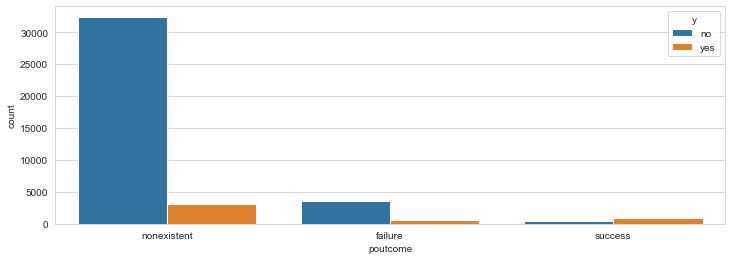

In [18]:
plt.figure(figsize=(12,4))
sns.countplot(data=df, x='poutcome', hue='y', order=df['poutcome'].value_counts(ascending=False).index)
plt.show()

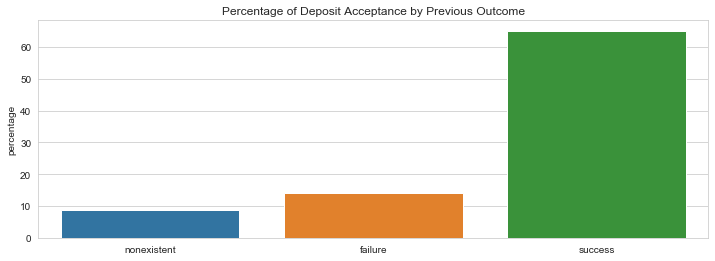

In [19]:
percentage = {}
for i in df['poutcome'].value_counts(ascending=False).index:
    percentage[i] = (len(df[(df['poutcome']==i) & (df['y']=='yes')]) / len(df[df['poutcome']==i])) * 100

plt.figure(figsize=(12,4))    
sns.barplot(x=pd.DataFrame(percentage, index=['percentage']).transpose().index, y=pd.DataFrame(percentage, index=['percentage']).transpose()['percentage'])

plt.title('Percentage of Deposit Acceptance by Previous Outcome')
plt.show()

Based on the graph, it is shown that clients that accept the deposit from the previous campaign tend to also accept the deposit again at the next campaign.

## 2. Numerical Columns Exploration

### A. Age

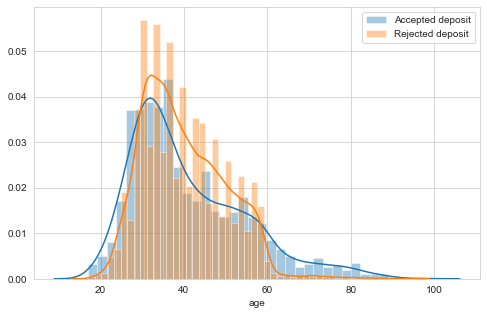

In [20]:
plt.figure(figsize=(8,5))
sns.distplot(df[df['y']=='yes']['age'], label='Accepted deposit')
sns.distplot(df[df['y']=='no']['age'], label='Rejected deposit')
plt.legend()
plt.show()

In [21]:
df.groupby('y')['age'].mean()

y
no     39.911185
yes    40.913147
Name: age, dtype: float64

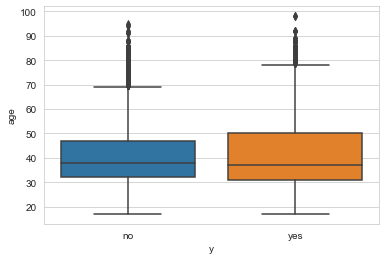

In [22]:
sns.boxplot(data=df, x='y', y='age')

It is shown that there is not much age difference between the age of clients who accepted and rejected the deposit.

### B. Campaign

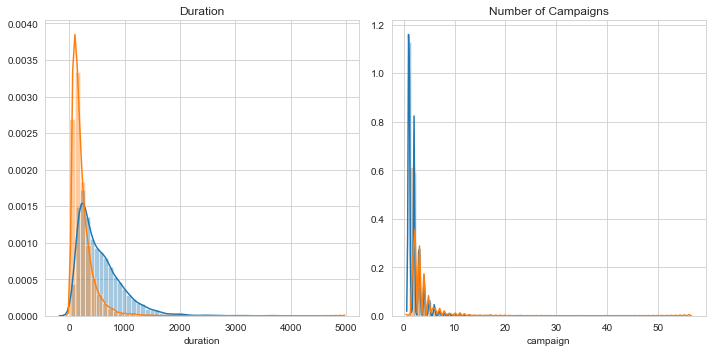

In [23]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df[df['y']=='yes']['duration'], label='Accepted deposit')
sns.distplot(df[df['y']=='no']['duration'], label='Rejected deposit')

plt.title('Duration')

plt.subplot(1,2,2)
sns.distplot(df[df['y']=='yes']['campaign'], label='Accepted deposit')
sns.distplot(df[df['y']=='no']['campaign'], label='Rejected deposit')

plt.title('Number of Campaigns')

plt.tight_layout()
plt.show()

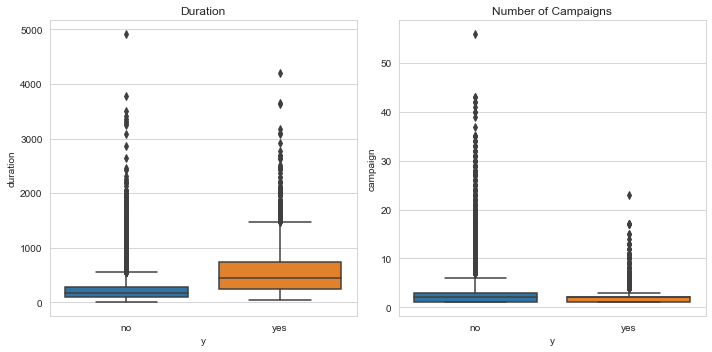

In [24]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(data=df, x='y', y='duration')

plt.title('Duration')

plt.subplot(1,2,2)
sns.boxplot(data=df, x='y', y='campaign')

plt.title('Number of Campaigns')

plt.tight_layout()
plt.show()

There is much difference of duration between phone calls to clients who accept the deposit and reject the deposit. But we cannot know the duration of calls before the call itself happens. Therefore, eventhough this feature can distinct the accepting and rejecting clients, it cannot be used as a feature in machine learning modelling.

### C. Social and Economic Context

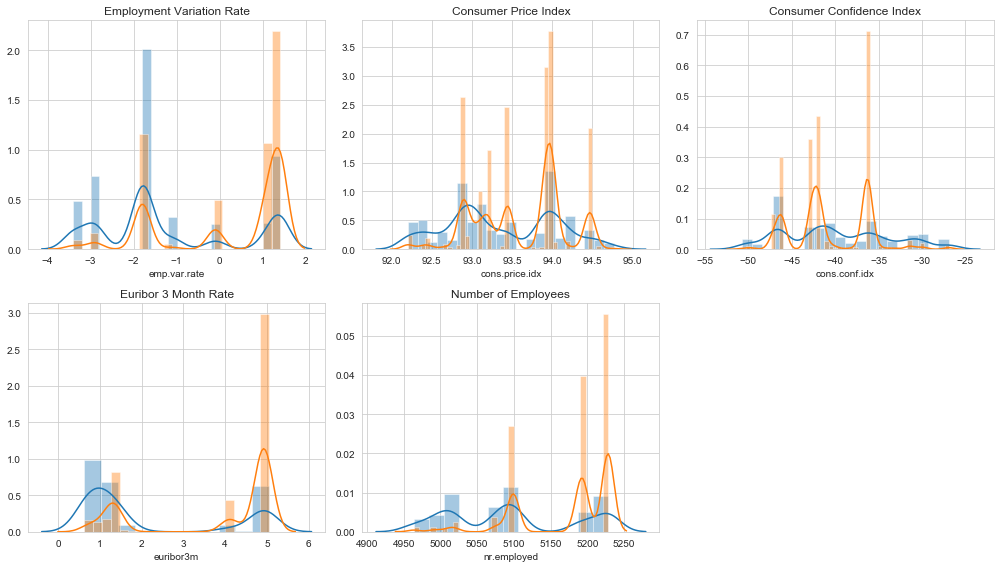

In [25]:
plt.figure(figsize=(14,8))
plt.subplot(2,3,1)
sns.distplot(df[df['y']=='yes']['emp.var.rate'], label='Accepted deposit')
sns.distplot(df[df['y']=='no']['emp.var.rate'], label='Rejected deposit')

plt.title('Employment Variation Rate')

plt.subplot(2,3,2)
sns.distplot(df[df['y']=='yes']['cons.price.idx'], label='Accepted deposit')
sns.distplot(df[df['y']=='no']['cons.price.idx'], label='Rejected deposit')

plt.title('Consumer Price Index')

plt.subplot(2,3,3)
sns.distplot(df[df['y']=='yes']['cons.conf.idx'], label='Accepted deposit')
sns.distplot(df[df['y']=='no']['cons.conf.idx'], label='Rejected deposit')

plt.title('Consumer Confidence Index')

plt.subplot(2,3,4)
sns.distplot(df[df['y']=='yes']['euribor3m'], label='Accepted deposit')
sns.distplot(df[df['y']=='no']['euribor3m'], label='Rejected deposit')

plt.title('Euribor 3 Month Rate')

plt.subplot(2,3,5)
sns.distplot(df[df['y']=='yes']['nr.employed'], label='Accepted deposit')
sns.distplot(df[df['y']=='no']['nr.employed'], label='Rejected deposit')

plt.title('Number of Employees')

plt.tight_layout()
plt.show()

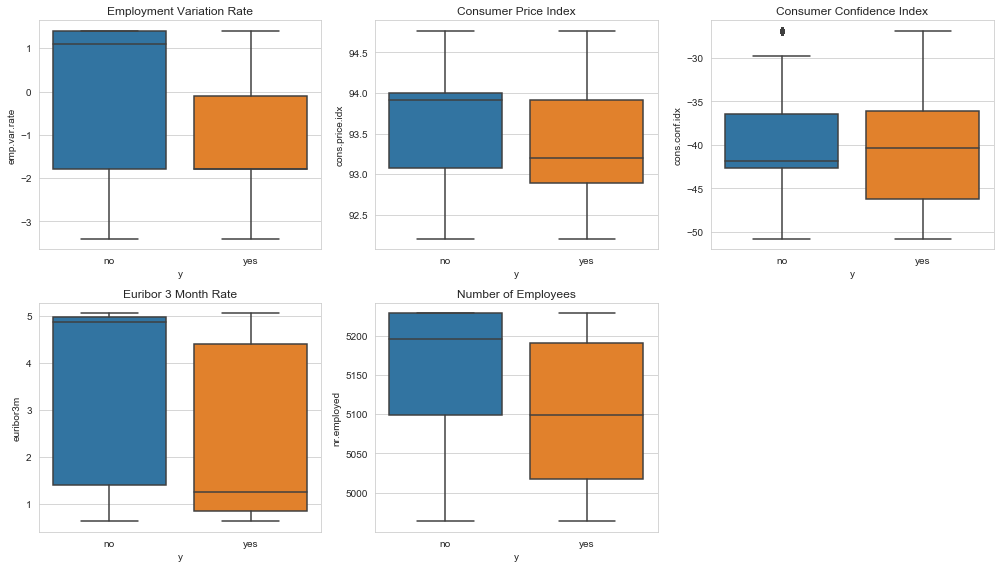

In [26]:
plt.figure(figsize=(14,8))
plt.subplot(2,3,1)
sns.boxplot(data=df, x='y',y='emp.var.rate')
plt.title('Employment Variation Rate')

plt.subplot(2,3,2)
sns.boxplot(data=df, x='y',y='cons.price.idx')

plt.title('Consumer Price Index')

plt.subplot(2,3,3)
sns.boxplot(data=df, x='y',y='cons.conf.idx')

plt.title('Consumer Confidence Index')

plt.subplot(2,3,4)
sns.boxplot(data=df, x='y',y='euribor3m')

plt.title('Euribor 3 Month Rate')

plt.subplot(2,3,5)
sns.boxplot(data=df, x='y',y='nr.employed')

plt.title('Number of Employees')

plt.tight_layout()
plt.show()

### D. Previous Campaign 

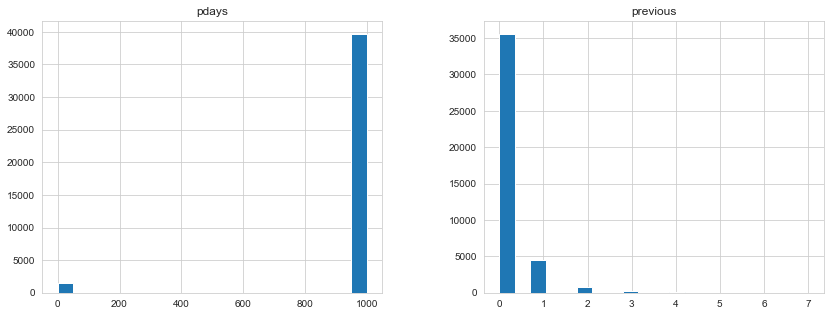

In [27]:
df[['pdays', 'previous']].hist(bins=20, figsize=(14,5))
plt.show()

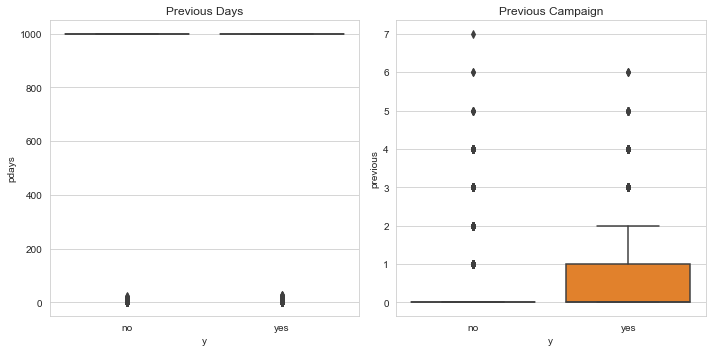

In [28]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(data=df, x='y', y='pdays')

plt.title('Previous Days')

plt.subplot(1,2,2)
sns.boxplot(data=df, x='y', y='previous')

plt.title('Previous Campaign')

plt.tight_layout()
plt.show()

Based on the graph, we can see that 'pdays' column seem to have a lot of outliers.

In [29]:
df[['pdays']].describe()

,pdays
count,41188.000000
mean,962.475454
std,186.910907
min,0.000000
25%,999.000000
50%,999.000000
75%,999.000000
max,999.000000


The majority of observations in pdyas column seems to have 999 value. Therefore, we will split this column later to separate the 999 values from this column.

## 3. Target Column Exploration

In [30]:
df['y'].value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: y, dtype: float64

In [31]:
df['y'].value_counts().values

array([36548,  4640], dtype=int64)

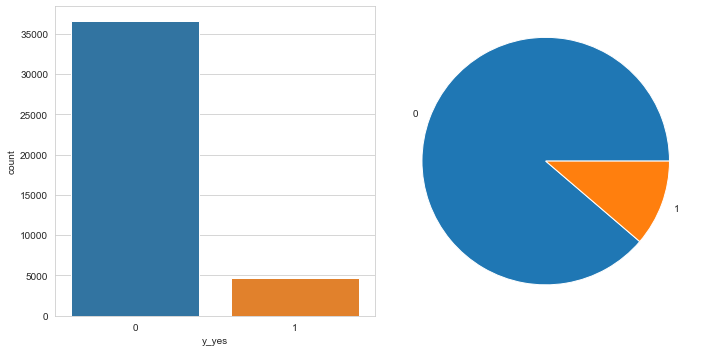

In [95]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(data=df, x='y_yes')

plt.subplot(1,2,2)
plt.pie(df['y_yes'].value_counts().values, labels=df['y_yes'].value_counts().index,)

plt.tight_layout()
plt.show()



On the diagram we see that counts for 'yes' and 'no' values for target column are imbalance. Therefore, later we will use SMOTE to overcome the oversampled data.

# III. Data Cleaning

## 1. Handling Outliers

#### 'pdays' column

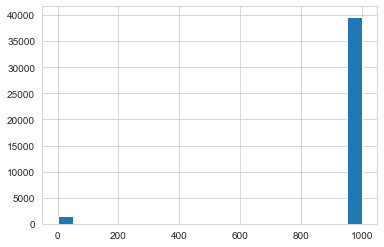

In [33]:
df['pdays'].hist(bins=20)
plt.show()

In [34]:
df['pdays'].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20], dtype=int64)

In [35]:
len(df[df['pdays']==999])

39673

'pdays' holds the number of days that passed by after the client was last contacted from a previous campaign. 'pdays' = 999 means that client was not previously contacted. Therefore, we will make new categorical column based on this information.

In [36]:
def pdays_count(x):
    if x == 999:
        return 0
    else:
        return x
df['pdays_count'] = df['pdays'].apply(pdays_count)

In [37]:
def pdays(x):
    if x == 999:
        return 0
    else:
        return 1
df['pdays'] = df['pdays'].apply(pdays)

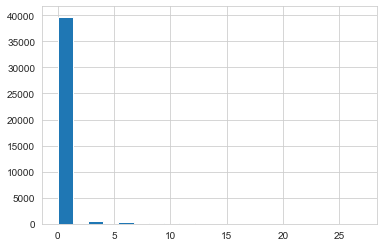

In [38]:
df['pdays_count'].hist(bins=20)
plt.show()

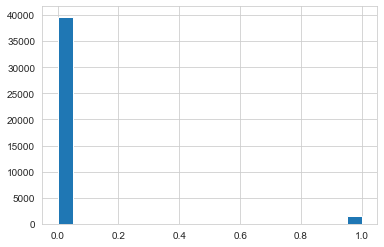

In [39]:
df['pdays'].hist(bins=20)
plt.show()

## 2. Encoding Categorical Columns

In [40]:
df.describe(include=object)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [41]:
df = pd.get_dummies(df, drop_first=True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 55 columns):
age                              41188 non-null int64
duration                         41188 non-null int64
campaign                         41188 non-null int64
pdays                            41188 non-null int64
previous                         41188 non-null int64
emp.var.rate                     41188 non-null float64
cons.price.idx                   41188 non-null float64
cons.conf.idx                    41188 non-null float64
euribor3m                        41188 non-null float64
nr.employed                      41188 non-null float64
pdays_count                      41188 non-null int64
job_blue-collar                  41188 non-null uint8
job_entrepreneur                 41188 non-null uint8
job_housemaid                    41188 non-null uint8
job_management                   41188 non-null uint8
job_retired                      41188 non-null uint8
job_self-employed

## 3. More EDA

Now that every columns have been encoded into numerical, we will do more exploratory analysis. 

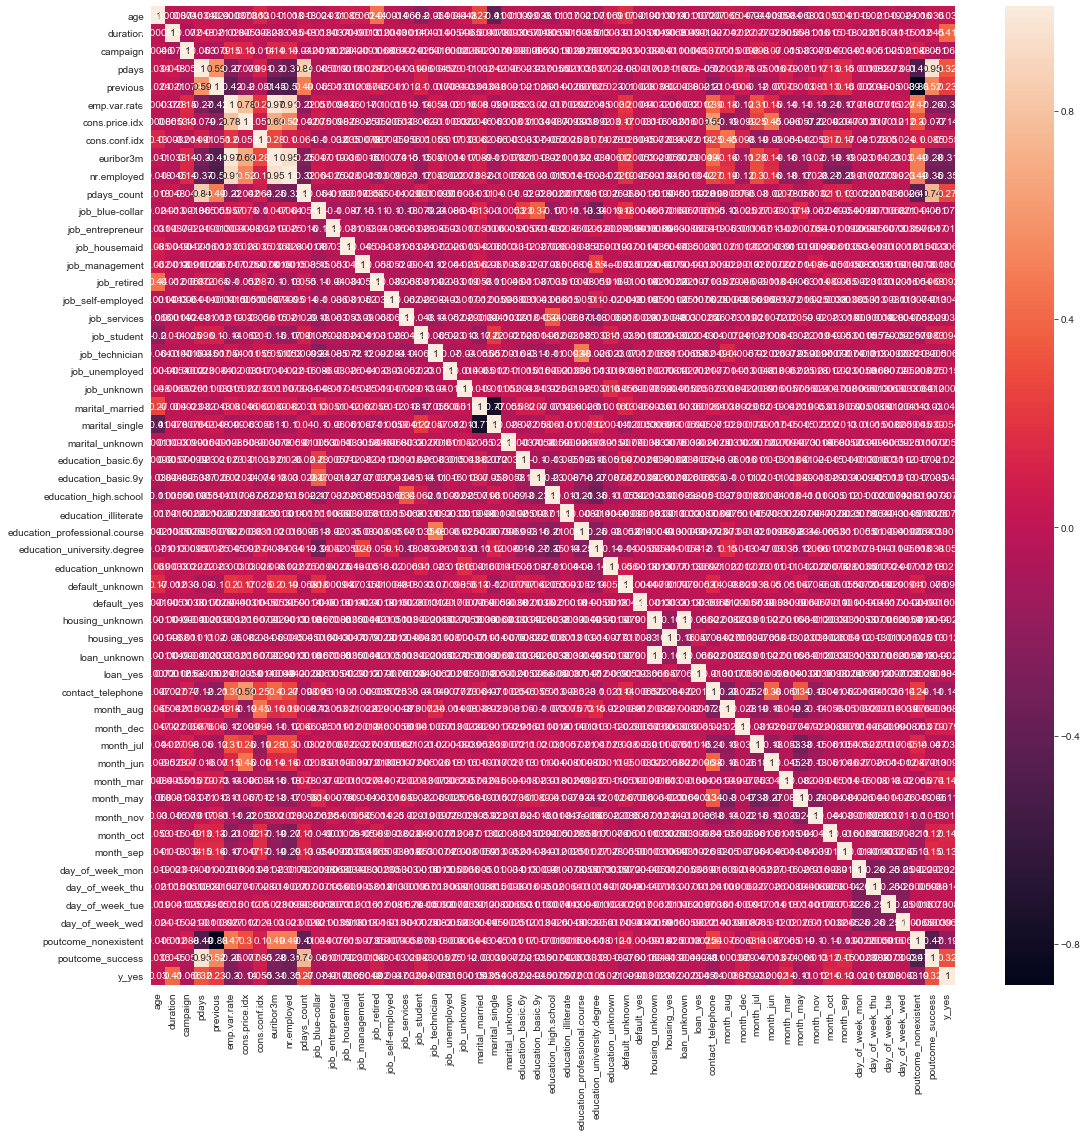

In [43]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), annot=True)

As you can see, it's not very clear which feature influence the target the most. Therefore, we will use correlation ratio to analyze further.

In [44]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

Text(0, 0.5, 'Parameter(s)')

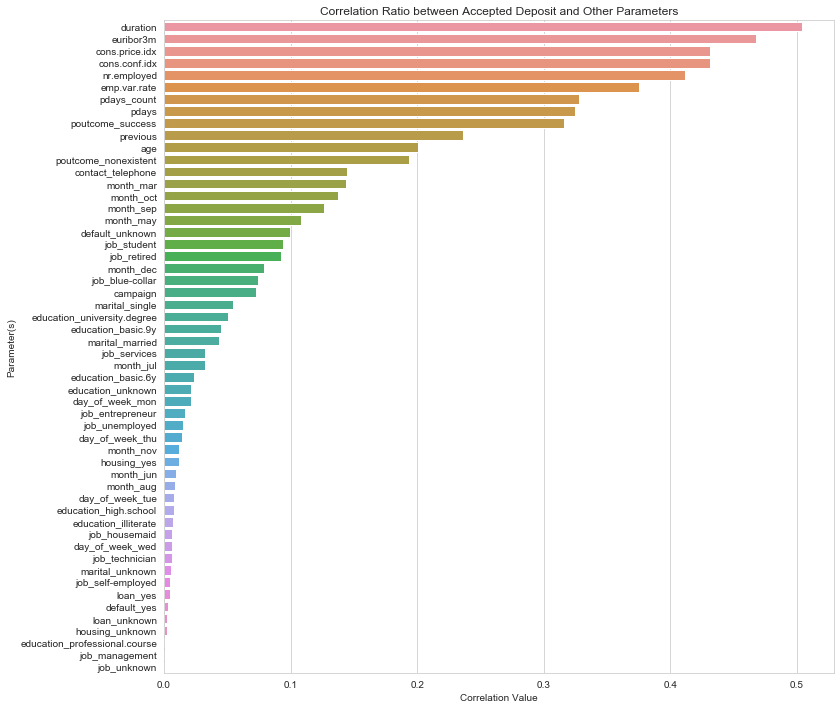

In [45]:
lis = []
for i in df.drop('y_yes', axis=1).columns:
    lis.append([i,correlation_ratio(df[i], df['y_yes'])])
lis = pd.DataFrame(lis).sort_values(1, ascending=False)

plt.figure(figsize=(12,12))
sns.barplot(y=lis[0], x=lis[1])
plt.title('Correlation Ratio between Accepted Deposit and Other Parameters')
plt.xlabel('Correlation Value')
plt.ylabel('Parameter(s)')

Based on the graph, it is shown that the feature that has highest correlation with accepted deposit is duration. It means that the longer the duration of the telemarketing, the high the probability of a client to accept the deposit. But as stated before, it does not make any sense if duration is included in the model because we will not know the duration of the phone call before it happens.

# IV. Machine Learning

## 1. Train Test Split

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X = df.drop(['y_yes', 'duration'], axis=1)
y = df['y_yes']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## 2. SMOTE

In [49]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=101)
X_sm, y_sm = sm.fit_sample(X_train, y_train)

## 3. Fitting Base Models 

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, auc
import warnings
warnings.filterwarnings('ignore')

In [58]:
def score_algorithm(model):
    clf = model()
    # Fitting
    clf.fit(X_sm, y_sm)
    # Evaluating Train Data
    prediction_train = clf.predict(X_sm)
    precision_train = precision_score(y_sm, prediction_train)
    recall_train = precision_score(y_sm, prediction_train)
    accuracy_train = accuracy_score(y_sm, prediction_train)
    # Evaluating Test Data
    prediction_test = clf.predict(X_test)
    precision_test = precision_score(y_test, prediction_test)
    recall_test = recall_score(y_test, prediction_test)
    accuracy_test = accuracy_score(y_test, prediction_test)
    all_score = [precision_train,  recall_train, accuracy_train, precision_test, recall_test, accuracy_test]
    return all_score

In [69]:
algorithm = [LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, GradientBoostingClassifier, SVC, KNeighborsClassifier, MLPClassifier, GaussianNB]
all_score=[]
for item in algorithm:
    score = score_algorithm(item)
    all_score.append(score)

In [70]:
df_score = pd.DataFrame(all_score, index =['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier', 'SVC', 'KNeighborsClassifier', 'MLPClassifier', 'GaussianNB'], columns=['precision_train',  'recall_train', 'accuracy_train', 'precision_test', 'recall_test', 'accuracy_test'])
df_score

,precision_train,recall_train,accuracy_train,precision_test,recall_test,accuracy_test
LogisticRegression,0.813688,0.813688,0.797226,0.298805,0.547445,0.797766
DecisionTreeClassifier,0.998183,0.998183,0.996430,0.288642,0.352450,0.823501
RandomForestClassifier,0.996548,0.996548,0.996430,0.462545,0.405631,0.875941
GradientBoostingClassifier,0.890571,0.890571,0.871929,0.381877,0.492179,0.848143
SVC,0.717827,0.717827,0.717961,0.256252,0.694473,0.729789
KNeighborsClassifier,0.845459,0.845459,0.903635,0.236429,0.613139,0.724448
MLPClassifier,0.990074,0.990074,0.722676,0.647887,0.047967,0.886137
GaussianNB,0.804485,0.804485,0.803871,0.276170,0.547445,0.780286


Based on Precision Score and Accuracy Score, the top 3 models are:
1. MLP / Neural Network Classifier
1. Random Forest Classifier
1. Gradient Boosting Classifier

In [71]:
model = MLPClassifier()
model.fit(X_sm, y_sm)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [72]:
prediction_test = model.predict(X_test)

In [73]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.94      0.47      0.63      7279
           1       0.16      0.78      0.27       959

    accuracy                           0.51      8238
   macro avg       0.55      0.63      0.45      8238
weighted avg       0.85      0.51      0.58      8238



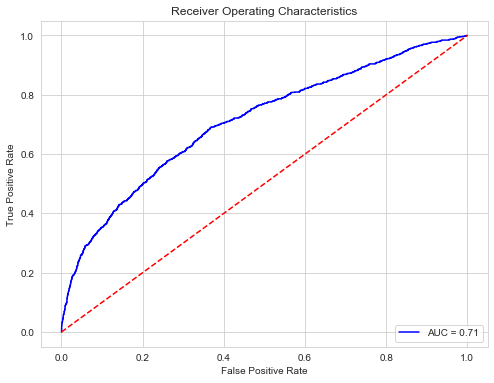

In [74]:
predProbTest = model.predict_proba(X_test)

preds = predProbTest[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.title('Receiver Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(round(roc_auc, 2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Based on the ROC-AUC Curve, we know that the MLP Classifier Model is still not stable.

## 4. Hyperparameter Tuning for MLP Classifier

The criteria for hyperparameter tuning is Precision + ROC-AUC.

### A. Hidden Layer Sizes

In [51]:
from sklearn.model_selection import GridSearchCV

In [76]:
search_mlp_1 = GridSearchCV(estimator=MLPClassifier(random_state=101),
                    param_grid= {
                        'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
                    }, scoring=['precision', 'roc_auc'],
                    refit = 'roc_auc',cv=3,n_jobs=-1)

In [77]:
search_mlp_1.fit(X_sm,y_sm)

GridSearchCV(cv=3, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=101, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'h

In [78]:
search_mlp_1.best_params_, search_mlp_1.best_score_

({'hidden_layer_sizes': (50, 50, 50)}, 0.9297700515750211)

Hidden layer sizes = **(50, 50, 50)**

### B. Activation Function

In [79]:
search_mlp_2 = GridSearchCV(estimator=MLPClassifier(hidden_layer_sizes=(50,50,50), random_state=101),
                    param_grid= {
                        'activation': ['tanh', 'relu', 'logistic'],
                    }, scoring=['precision', 'roc_auc'],
                    refit = 'roc_auc',cv=3,n_jobs=-1)

In [80]:
search_mlp_2.fit(X_sm,y_sm)

GridSearchCV(cv=3, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08,
                                     hidden_layer_sizes=(50, 50, 50),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=101, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecat

In [81]:
search_mlp_2.best_params_, search_mlp_2.best_score_

({'activation': 'relu'}, 0.9297700515750211)

Activation function: **relu**

### C. Solver

In [82]:
search_mlp_3 = GridSearchCV(estimator=MLPClassifier(hidden_layer_sizes=(50,50,50), activation='relu', random_state=101),
                    param_grid= {
                        'solver': ['sgd', 'adam', 'lbfgs'],
                    }, scoring=['precision', 'roc_auc'],
                    refit = 'roc_auc',cv=3,n_jobs=-1)

In [84]:
search_mlp_3.fit(X_sm,y_sm)

GridSearchCV(cv=3, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08,
                                     hidden_layer_sizes=(50, 50, 50),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=101, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecat

In [85]:
search_mlp_3.best_params_, search_mlp_3.best_score_

({'solver': 'adam'}, 0.9297700515750211)

Activation function: **adam**

### D. Alpha

In [86]:
search_mlp_4 = GridSearchCV(estimator=MLPClassifier(hidden_layer_sizes=(50,50,50), activation='relu', 
                                                    solver='adam', random_state=101),
                    param_grid= {
                        'alpha': [0.00001, 0.0001, 0.001, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1],
                    }, scoring=['precision', 'roc_auc'],
                    refit = 'roc_auc',cv=3,n_jobs=-1)

In [87]:
search_mlp_4.fit(X_sm,y_sm)

GridSearchCV(cv=3, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08,
                                     hidden_layer_sizes=(50, 50, 50),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=101, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecat

In [88]:
search_mlp_4.best_params_, search_mlp_4.best_score_

({'alpha': 0.001}, 0.9299019984723077)

Alpha = **0.001**

### E. Learning Rate

In [89]:
search_mlp_5 = GridSearchCV(estimator=MLPClassifier(hidden_layer_sizes=(50,100,50), activation='relu', 
                                                    solver='adam', alpha=0.001, random_state=101),
                    param_grid= {
                        'learning_rate': ['constant','adaptive']
                    }, scoring=['precision', 'roc_auc'],
                    refit = 'roc_auc',cv=3,n_jobs=-1)

In [90]:
search_mlp_5.fit(X_sm,y_sm)

GridSearchCV(cv=3, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08,
                                     hidden_layer_sizes=(50, 100, 50),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=101, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecat

In [91]:
search_mlp_5.best_params_, search_mlp_5.best_score_

({'learning_rate': 'constant'}, 0.9301041675885743)

Learning rate = **constant**

In [92]:
pred = search_mlp_5.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      7279
           1       0.39      0.31      0.34       959

    accuracy                           0.86      8238
   macro avg       0.65      0.62      0.63      8238
weighted avg       0.85      0.86      0.86      8238



### F. Final Model

In [94]:
mlp_new = MLPClassifier(activation='relu',
  alpha=0.001,
  hidden_layer_sizes =(50,50,50),
  learning_rate='constant',
  solver='adam',
  random_state=101)

In [95]:
mlp_new.fit(X_sm, y_sm)

MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=101, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [96]:
pred = mlp_new.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      7279
           1       0.37      0.39      0.38       959

    accuracy                           0.85      8238
   macro avg       0.64      0.65      0.65      8238
weighted avg       0.85      0.85      0.85      8238



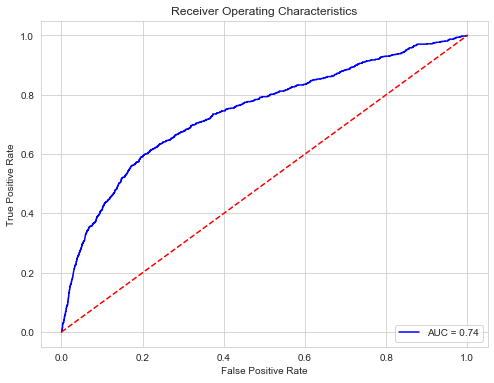

In [97]:
predProbTest = mlp_new.predict_proba(X_test)

preds = predProbTest[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.title('Receiver Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(round(roc_auc, 2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Based on this report, we can see that precision becomes lower than base model. Next we will try to tune hyperparameters in Random Forest Classifier.

## 4. Hyperparameter Tuning for Random Forest Classifier

### A. Max Depth 

In [98]:
search_rfc_1 = GridSearchCV(estimator=RandomForestClassifier(random_state=101),
                    param_grid= {
                        'max_depth':[10,20,30,40,50,]
                    }, scoring=['precision', 'roc_auc'],
                    refit = 'roc_auc',cv=3,n_jobs=-1)

In [99]:
search_rfc_1.fit(X_sm, y_sm)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=101,
                                 

In [100]:
search_rfc_1.best_params_, search_rfc_1.best_score_

({'max_depth': 30}, 0.976725100503011)

### B. Min Samples Split

In [101]:
search_rfc_2 = GridSearchCV(estimator=RandomForestClassifier(max_depth=30, random_state=101),
                    param_grid= {
                        'min_samples_split':[1,2,3,4,5,6,7,8,9,10,50,100,500]
                    }, scoring=['precision', 'roc_auc'],
                    refit = 'roc_auc',cv=3,n_jobs=-1)

In [102]:
search_rfc_2.fit(X_sm, y_sm)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=30,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=101,
                                   

In [103]:
search_rfc_2.best_params_, search_rfc_2.best_score_

({'min_samples_split': 2}, 0.976725100503011)

### C. Min Samples Leaf

In [109]:
search_rfc_3 = GridSearchCV(estimator=RandomForestClassifier(max_depth=30, min_samples_split=2, random_state=101),
                    param_grid= {
                        'min_samples_leaf': [0.1,1,2,3,4,5,500,1000,1500,2000,2500,3000,3500,4000]
                    }, scoring=['precision', 'roc_auc'],
                    refit = 'roc_auc',cv=3,n_jobs=-1)

In [110]:
search_rfc_3.fit(X_sm, y_sm)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=30,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=101,
                                   

In [111]:
search_rfc_3.best_params_, search_rfc_3.best_score_

({'min_samples_leaf': 1}, 0.976725100503011)

### D. N Estimators

In [70]:
search_rfc_4 = GridSearchCV(estimator=RandomForestClassifier(max_depth=30, min_samples_split=2, min_samples_leaf=1, random_state=101),
                    param_grid= {
                        'n_estimators': [1, 100, 500, 800, 1500]
                    }, scoring=['precision', 'roc_auc'],
                    refit = 'roc_auc',cv=3,n_jobs=-1)

In [71]:
search_rfc_4.fit(X_sm, y_sm)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=30,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=101,
                                   

In [72]:
search_rfc_4.best_params_, search_rfc_4.best_score_

({'n_estimators': 1500}, 0.9776171303871278)

In [86]:
pred = search_rfc_4.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      7279
           1       0.46      0.39      0.42       959

    accuracy                           0.88      8238
   macro avg       0.69      0.67      0.68      8238
weighted avg       0.87      0.88      0.87      8238



### E. Final Model

In [73]:
rfc_new = RandomForestClassifier(max_depth=30, min_samples_split=2, min_samples_leaf=1, n_estimators=1500, random_state=101)

In [74]:
rfc_new.fit(X_sm, y_sm)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1500,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [75]:
pred = rfc_new.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      7279
           1       0.46      0.39      0.42       959

    accuracy                           0.88      8238
   macro avg       0.69      0.67      0.68      8238
weighted avg       0.87      0.88      0.87      8238



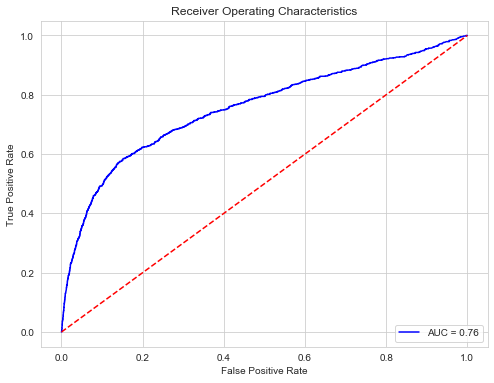

In [76]:
predProbTest = rfc_new.predict_proba(X_test)

preds = predProbTest[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.title('Receiver Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(round(roc_auc, 2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

From hyperparameters tuning, we choose RFC as it has higher accuracy, precision, and AUC. But it may need more tuning because the precision score is still low (below 0.5). Due to limited computation we will use this model as final model.

## 5. Feature Importance

In [77]:
score = pd.DataFrame(rfc_new.feature_importances_, columns=['Score'], index=X.columns)

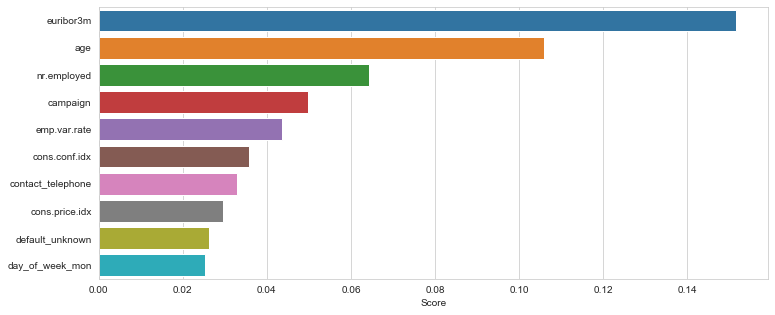

In [78]:
plt.figure(figsize=(12,5))
sns.barplot(data=score.sort_values(by=['Score'], ascending=False).head(10), x='Score', y=score.sort_values(by=['Score'], ascending=False).head(10).index)

Based on the feature importance graph, the feature that most influence deposit acceptance is Euribor 3 months rate.

# V. Export Model

In [79]:
import pickle

In [80]:
filename = 'finalized_model.sav'
pickle.dump(rfc_new, open(filename, 'wb'))

In [81]:
filename = 'x_dummy_columns.sav'
pickle.dump(X.columns, open(filename , 'wb'))

In [82]:
real_columns = pd.read_csv('bank-additional-full.csv', sep=';').drop(['duration','y'], axis=1).columns
real_columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed'],
      dtype='object')

In [93]:
X.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'pdays_count', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcom

In [83]:
len(real_columns)

19

In [84]:
filename = 'real_columns.sav'
pickle.dump(real_columns, open(filename , 'wb'))

In [85]:
filename = 'feature_importance.sav'
pickle.dump(score, open(filename , 'wb'))

#### Additional

In [ ]:
# Random Forest Classifier
rfc = RandomForestClassifier()
search_rfc = GridSearchCV(estimator=rfc,
                    param_grid= {
                        'n_estimators' : [500, 800, 1500, 2500, 5000],
                        'max_features' : ['auto','sqrt','log2'],
                        'max_depth' : [10,20,30,40,50],
                        'min_samples_split' : [2,5,10,15,20],
                        'min_samples_leaf' : [1,2,5,10,15],
                    }, scoring='precision',cv=3,n_jobs=-1)

In [ ]:
## Fitting with SMOTE Data
search_rfc.fit(X_sm,y_sm)

In [ ]:
pred_gridsearch_rfc = search_rfc.predict(X_test)
print(classification_report(y_test, pred_gridsearch_rfc))

In [ ]:
precision_rfc = precision_score(y_test, pred_gridsearch_rfc)
recall_rfc = recall_score(y_test, pred_gridsearch_rfc)
accuracy_rfc = accuracy_score(y_test, pred_gridsearch_rfc)
params_rfc = search_rfc.best_params_

In [ ]:
# Gradient Boosting Classifier
gbc = GradientBoostingClassifier()
search_gbc = GridSearchCV(estimator=gbc,
                    param_grid= {
                        'learning_rate' : [1, 0.5, 0.25, 0.1, 0.05, 0.01],
                        'n_estimators' : [1, 2, 4, 8, 16, 32, 64, 100, 200],
                        'max_depth' : [2,3,4,5,6,7]                      
                    }, scoring='precision',cv=3,n_jobs=-1)

In [ ]:
## Fitting SMOTE Data
search_gbc.fit(X_sm,y_sm)

In [ ]:
pred_gridsearch_gbc = search_gbc.predict(X_test)
print(classification_report(y_test, pred_gridsearch_gbc))

In [ ]:
precision_gbc = precision_score(y_test, pred_gridsearch_gbc)
recall_gbc = recall_score(y_test, pred_gridsearch_gbc)
accuracy_gbc = accuracy_score(y_test, pred_gridsearch_gbc)
params_gbc = search_gbc.best_params_

In [ ]:
# MLP Classifier
mlp = MLPClassifier()
search_mlp = GridSearchCV(estimator=mlp,
                    param_grid= {
                    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
                    'activation': ['tanh', 'relu'],
                    'solver': ['sgd', 'adam'],
                    'alpha': [0.0001, 0.05],
                    'learning_rate': ['constant','adaptive'],
                    }, scoring='precision',cv=3,n_jobs=-1)

In [ ]:
## Fitting SMOTE Data
search_mlp.fit(X_sm,y_sm)

In [ ]:
pred_gridsearch_mlp = search_mlp.predict(X_test)
print(classification_report(y_test, pred_gridsearch_mlp))

In [ ]:
precision_mlp = precision_score(y_test, pred_gridsearch_mlp)
recall_mlp = recall_score(y_test, pred_gridsearch_mlp)
accuracy_mlp = accuracy_score(y_test, pred_gridsearch_mlp)
params_mlp = search_mlp.best_params_

In [ ]:
df_report = pd.DataFrame({'Model':['Random Forest Classifier', 'Gradient Boosting Classifier','MLP Classifier'],
                         'Precision': [precision_rfc, precision_gbc, precision_mlp],
                         'Recall': [recall_rfc, recall_gbc, recall_mlp],
                         'Accuracy': [accuracy_rfc, accuracy_gbc, accuracy_mlp],
                         'Best Parameter' : [params_rfc, params_gbc, params_mlp]})

In [ ]:
df_report

In [ ]:
search.best_params_